$$\Huge\textbf{Data Mining}$$

$$\Large\textbf{Breast Cancer Analysis}$$

$$\Large\textbf{Daniel Elston}$$

In [1]:
import textwrap
import pandas as pd
import numpy as np
import sklearn.impute as ski
import scipy.stats as sci
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import svd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA as pca
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.manifold import MDS
from scipy.spatial import distance_matrix
from scipy.spatial import distance

$\Large\textbf{Section 6: Breast Cancer}$

$\large\textbf{Section 6.1: Data Load In}$

Loading in the data for the breast cancer dataset.

In [2]:
load3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
load3.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
load3

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


$$\newline$$

$\large\textbf{Section 6.2: Data Cleaning}$

The data is cleaned to remove and object data types and missing values. Missing values are replaced with the median.

In [3]:
print('Number of instances = %d' % (load3.shape[0]))
print('Number of attributes = %d' % (load3.shape[1]))

print('Number of missing values:')
for col in load3.columns:
    print('\t%s: %d' % (col,load3[col].isna().sum()))

Number of instances = 699
Number of attributes = 11
Number of missing values:
	Sample code: 0
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 0
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [4]:
load3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
print('\nBare Nuclei values:')
print(load3['Bare Nuclei'].unique())


Bare Nuclei values:
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [6]:
print('Finding the median of bare nuclei as an integar:')
out = pd.to_numeric(load3['Bare Nuclei'], errors='coerce').median()
replace = int(out)
replace

Finding the median of bare nuclei as an integar:


1

In [7]:
df3 = load3.replace(['?'], [replace])

In [8]:
print('The resulting Bare Nuclei dataset values are:')
print(df3['Bare Nuclei'].unique())

The resulting Bare Nuclei dataset values are:
['1' '10' '2' '4' '3' '9' '7' 1 '5' '8' '6']


In [9]:
df3["Bare Nuclei"] = pd.to_numeric(df3["Bare Nuclei"], errors="coerce")
df3

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code                  699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


$$\newline$$

$\large\textbf{Section 6.3: Data Normalisation}$

The data is normalised using z-score normalisation. This is done column by column.

In [11]:
z_sc = sci.zscore(df3['Sample code'])
z_ct = sci.zscore(df3['Clump Thickness'])
z_uocs = sci.zscore(df3['Uniformity of Cell Size'])
z_uocsh = sci.zscore(df3['Uniformity of Cell Shape'])
z_ma = sci.zscore(df3['Marginal Adhesion'])

z_secs = sci.zscore(df3['Single Epithelial Cell Size'])
z_bn = sci.zscore(df3['Bare Nuclei'])
z_bc = sci.zscore(df3['Bland Chromatin'])
z_nn = sci.zscore(df3['Normal Nucleoli'])
z_m = sci.zscore(df3['Mitoses'])

In [12]:
z_scd = pd.DataFrame(z_sc)
z_ctd = pd.DataFrame(z_ct)
z_uocsd = pd.DataFrame(z_uocs)
z_uocshd = pd.DataFrame(z_uocsh)
z_mad = pd.DataFrame(z_ma)

z_secsd = pd.DataFrame(z_secs)
z_bnd = pd.DataFrame(z_bn)
z_bcd = pd.DataFrame(z_bc)
z_nnd = pd.DataFrame(z_nn)
z_md = pd.DataFrame(z_m)

In [13]:
df3_norm = z_scd.assign(Clump_Thickness = z_ctd,
                   Uniformity_of_cell_Size = z_uocsd,
                   Uniformity_of_cell_Shape = z_uocshd,
                   Marginal_Adhesion = z_mad,
                   Single_Epithelial_Cell_Size = z_secsd,
                   Bare_Nuclei = z_bnd,
                   Bland_Chromatin = z_bcd,
                   Normal_Nucleoli = z_nnd,
                   Mitoses = z_md
                  )
df3_norm

,0,Clump_Thickness,Uniformity_of_cell_Size,Uniformity_of_cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
...,...,...,...,...,...,...,...,...,...,...
694,-0.478370,-0.503866,-0.699995,-0.743299,-0.633247,-0.097628,-0.410685,-1.000471,-0.611825,-0.343912
695,-0.372875,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,-0.343912
696,-0.296575,0.206936,2.251526,2.287222,0.067687,1.710106,-0.134392,1.872361,2.337594,0.239570
697,-0.282546,-0.148465,1.595632,0.940324,0.418154,-0.097628,0.141902,2.693171,1.026741,-0.343912


$$\newline$$

$\large\textbf{Section 6.4: Principle Component Analysis}$

Here I will pass a 3D dataset through a PCA of 2 components and plot the resulting scatter. I will then move on to pass the whole dataset through 2 components. Each part is complete with the covarient matrix and the explained variation per principle component.

Here is the 3D dataset passed using 2 components.

In [14]:
print('The covariant matrix for columns 3 and 4:')
features = df3_norm.T
cov_matrix = np.cov(features)
cov_matrix[3:4]

The covariant matrix for columns 3 and 4:


array([[-0.04163563,  0.65552689,  0.90818117,  1.00143266,  0.68405782,
         0.72069948,  0.70848734,  0.73700282,  0.72047704,  0.43953974]])

In [15]:
print('The eigenvector of columns 3 and 4:')
values, vectors = np.linalg.eig(cov_matrix)
values[3:4]

The eigenvector of columns 3 and 4:


array([0.08894811])

The dot product of the transpose matrices are computed. The resulting projected data is now put into a dataframe.

In [16]:
proj_1 = df3_norm.dot(vectors.T[0])
proj_2 = df3_norm.dot(vectors.T[1])

res = pd.DataFrame(proj_1, columns=['PC1'])
res['PC2'] = proj_2
res['Class'] = df3['Class']
res.head()
res.round(2)

,PC1,PC2,Class
0,-1.45,0.17,2
1,1.47,0.17,2
2,-1.58,0.16,2
3,1.51,-0.05,2
4,-1.33,0.15,2
...,...,...,...
694,-1.69,0.53,2
695,-2.05,0.42,2
696,3.83,-0.02,4
697,2.28,0.19,4


Outliers are dropped. Here is the dataframe for the 3D dataset over 2 components.

In [17]:
outliers = res.loc[(res['PC2']<= -5)]

In [18]:
drop = res.drop(outliers.index)
drop

,PC1,PC2,Class
0,-1.451545,0.173314,2
1,1.469490,0.167212,2
2,-1.575359,0.161272,2
3,1.507013,-0.051820,2
4,-1.326824,0.153224,2
...,...,...,...
694,-1.694439,0.526634,2
695,-2.049581,0.419526,2
696,3.832429,-0.020152,4
697,2.277413,0.191940,4


Here is the dataframe for the whole dataset over 2 components.

In [19]:
x = StandardScaler().fit_transform(df3_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [20]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [21]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['PC1', 'PC2'])
principal_breast_Df

,PC1,PC2
0,-1.451545,-0.173314
1,1.469490,-0.167212
2,-1.575359,-0.161272
3,1.507013,0.051820
4,-1.326824,-0.153224
...,...,...
694,-1.694439,-0.526634
695,-2.049581,-0.419526
696,3.832429,0.020152
697,2.277413,-0.191940


$$\newline$$

$\large\textbf{Section 6.5: Variance Ratio}$

The explained variance per principle component is given below for the 3D datset, then the entire dataset. Around 59% of the data is represented by the PCA component 1, and approximately 10% is represented by component 2. This leaves around 31% of the data lost after the PCA.

In [22]:
print('The explained variance per principle component:')
exp_var = []
for i in range(len(values)):
    exp_var.append(values[i] / np.sum(values))

np.sum(exp_var), exp_var

The explained variance per principle component:


(0.9999999999999999,
 [0.5895498258891495,
  0.09993664171398389,
  0.07740482029398649,
  0.008882086082111457,
  0.05388278841662272,
  0.04630474985733056,
  0.03804113993231625,
  0.026156560877720905,
  0.029514767907215564,
  0.030326619029562612])

In [23]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.58954983 0.09993664]


$$\newline$$

$\large\textbf{Section 6.6: Scatter Plots}$

The scatter plot of column 3 and 4 passed through 2 components

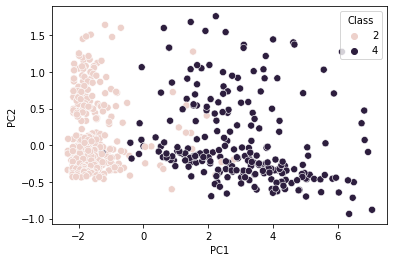

In [24]:
sns.scatterplot(x=drop['PC1'], y=drop['PC2'], hue=drop['Class'], s=50)

The scatter plots of the whole dataset passed through 2 components.

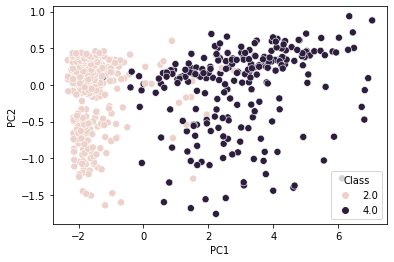

In [25]:
sns.scatterplot(x=principal_breast_Df['PC1'], y=principal_breast_Df['PC2'], hue=drop['Class'], s=50)

$$\newline$$

$\large\textbf{Section 6.7: Analysis Inference}$

The above graphs show a principle component analysis for a 3D dataset, and the entire dataset given above, passed through 2 components. For both graphs there is a clear difference in grouping. Class 2 is grouped more on the left where as class 4 is grouped more on the right. In both graphs again, class 2 seems to have a higher concentration than class 4, which is more spread out. The variance ratio suggests that data is quite clustered. However class 4 is clearly more spread out than class 2, this is further seen in the scatter plots.

$$\newline$$